<a href="https://colab.research.google.com/github/redjules/random-forest/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Directory, Libraries and Data

In [2]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest


In [1]:
#Libraries
import numpy as np
import pandas as pd

In [3]:
#load the data
df = pd.read_csv("CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [4]:
#Transform objects into numerical variables
df = pd.get_dummies(data = df,
                    drop_first = True)
# avoid dummy variable trap due to multicolinearity issue - drop one
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0


In [5]:
#Summary Statistics
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967,0.775588,0.440485,0.068992
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812,0.417353,0.496634,0.253536
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000,1.000000,0.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000


In [6]:
#isolate X and y
#card_yes is our independent varaible
y = df.card_yes
X = df.drop(columns = "card_yes")
X.head(1)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.03327,124.9833,3,54,1,12,1,0


In [8]:
#Training and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)
#stratify when you don't have a balanced dataset. mean card_yes is 0.77. 70% got credit card application accepted and 23% not. Not balanced, startify will assure balance between training and test

#Random Forest

In [9]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

#Model Assessment

In [11]:
#Predictions
predictions = model.predict(X_test)
#first 5 predictions
predictions[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

In [14]:
#Model Assessment
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       1.00      0.98      0.99       205

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.97       264
weighted avg       0.98      0.98      0.98       264



-print makes it prettier

-the f1_score is 0.99 which is massive

-the accuracy is 0.98, which means 98% of the answers are correct

In [15]:
#F1 Score
f1_score(y_test, predictions)

0.9877149877149877

#Feature Importance

<Axes: >

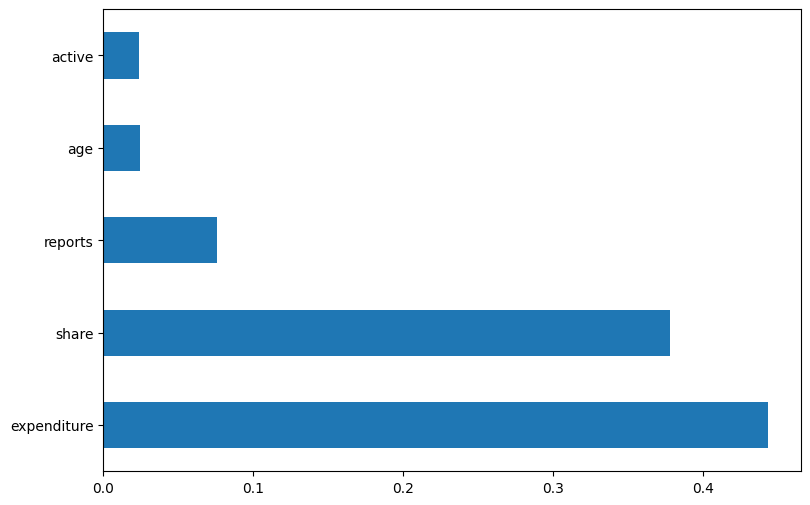

In [16]:
#Feature Importance
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (9,6))
#barh is horizontal bar

Most relevant:

-share: ratio of monthly credit card expenditure to yearly income

-expenditure: average monthly credit card expenditure

#Parameter Tuning

In [17]:
# Parameter grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(50,500,50)}
grid = ParameterGrid(param_grid)
grid[1]

{'n_estimators': 100}

In [18]:
#Parameter Tuning

#List where to store the results
f1score = []

#Loop
for params in grid:

  #build the model
  model = RandomForestClassifier(n_estimators = params['n_estimators'],
                                 random_state = 1502)
  model.fit(X_train, y_train)
  #Predictions
  predictions = model.predict(X_test)

  #accuracy assessment
  f1 = f1_score(y_test, predictions)
  #store the results
  f1score.append(f1)

In [19]:
#Best Parameters
best_params = grid[np.argmax(f1)]
print(best_params)

{'n_estimators': 50}


#Challenge

In [20]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest


In [21]:
#libraries
import pandas as pd
import numpy as np

In [22]:
#Load the Data
df = pd.read_csv("marketing_campaign.csv")
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


#Data Preparation

In [24]:
#Remove unwanted variables
df = df.iloc[:,2:]
df = df.drop(columns = ["Dt_Customer", "Recency"])
df.head(2)

,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Single,58138.0,0,0,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,Single,46344.0,1,1,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0


In [26]:
#Transform Year of Birth into Age
df['age'] = 2020 - df.Year_Birth
df = df.drop(columns = 'Year_Birth')

AttributeError: ignored

In [27]:
#Transform Objects
df = pd.get_dummies(df, drop_first=True)

In [28]:
#NAs
df=df.dropna()
df.isna().sum()

Income                     0
Kidhome                    0
Teenhome                   0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [30]:
#Isolate X and Y
y = df.Income
X = df.drop(columns = "Income")

In [31]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=1502)

#Random Forest

In [32]:
#Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300,
                              random_state = 1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

#Accuracy Assessment

In [33]:
#Predictions
predictions = model.predict(X_test)
predictions[:5]

array([65966.37666667, 21687.13333333, 64565.31666667, 49641.38      ,
       48238.17333333])

In [35]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

6510.381343843843
50734.41891891892
22073.552789063204


#Feature Importance

<Axes: >

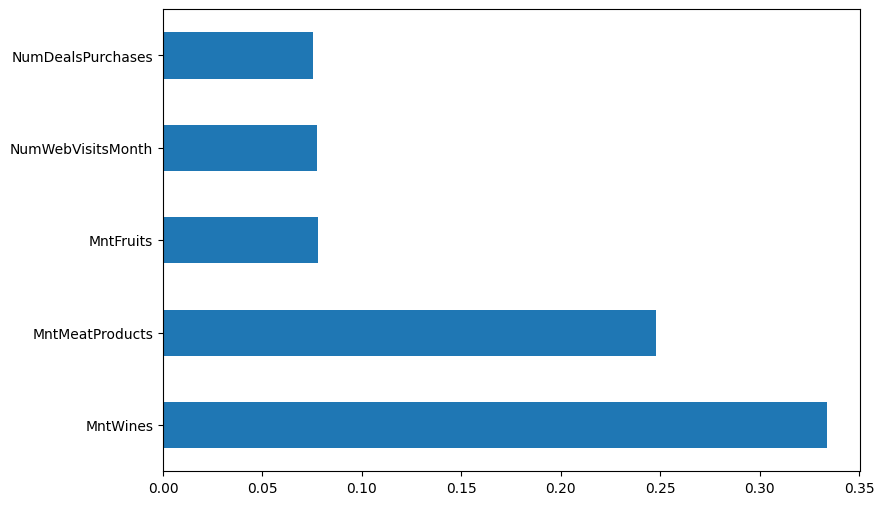

In [37]:
#Importance plot
importance = pd.Series(model.feature_importances_,
                        index = X_train.columns.values)
importance.nlargest(5).plot(kind = "barh",
                           figsize=(9,6))

-The most relevant to predict amount of income is the amount of wines and then amount of meat

#Parameter Tuning


In [41]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(50,500,20)}
grid = ParameterGrid(param_grid)

In [40]:
#Parameter Tuning
mae = []

#Start the loop
for params in grid:
  #model building
  model = RandomForestRegressor(n_estimators = params['n_estimators'],
                                random_state = 1502)
  
  model.fit(X_train, y_train)

  #predictions
  predictions = model.predict(X_test)

  #Assess Accuracy
  error = mean_absolute_error(y_test, predictions)
  mae.append(error)

  #best parameters

best_params = grid[np.argmin(error)]
print(best_params)

{'n_estimators': 50}
